In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, os, sys, re
warnings.filterwarnings('ignore')

In [5]:
path = './dataset/origin/'
tokens= os.listdir(path)

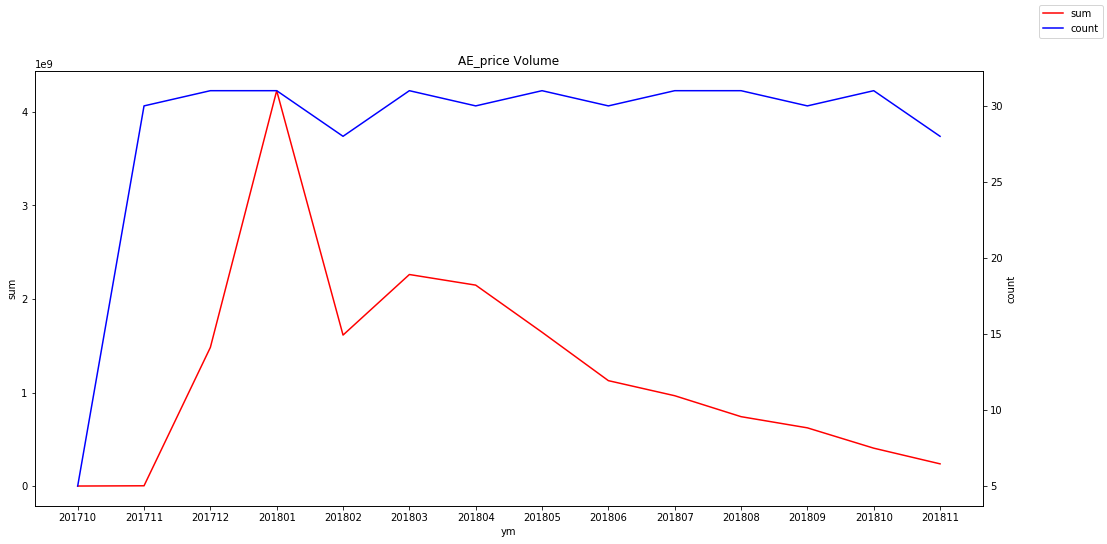

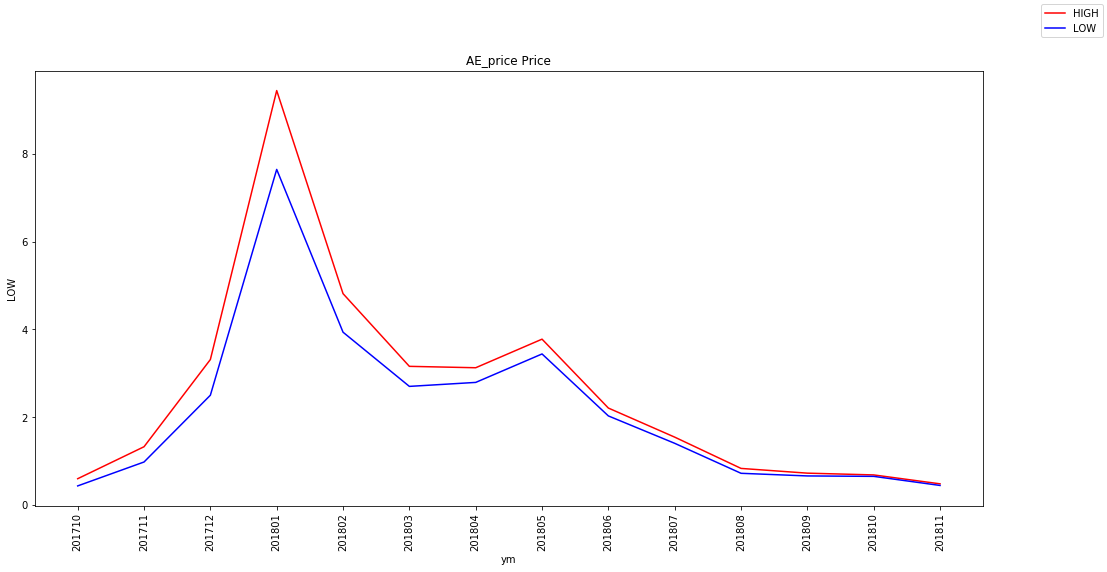

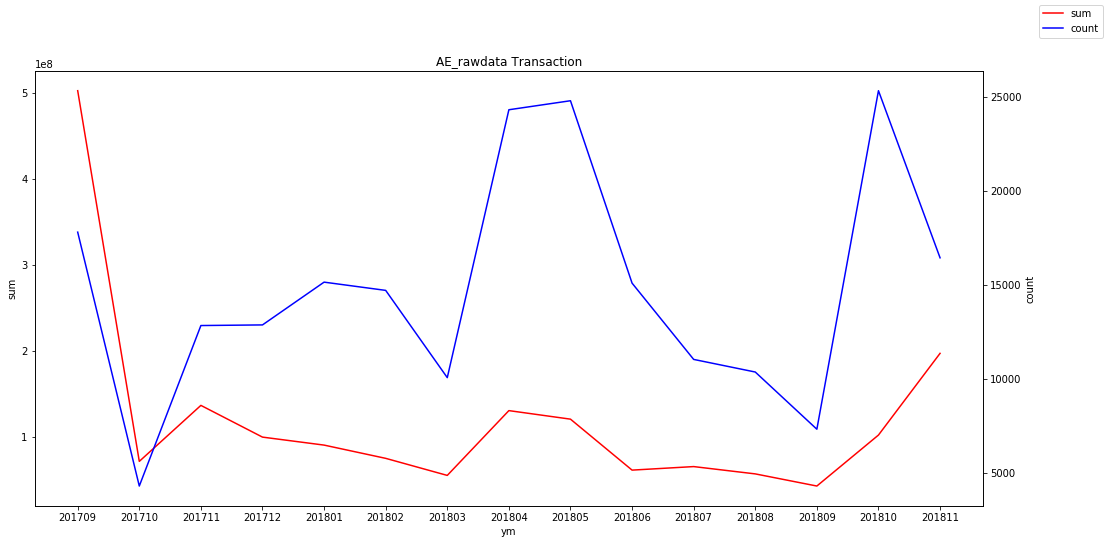

In [78]:
isRawdata = re.compile(r'.*_rawdata.txt')
isPrice = re.compile(r'.*_price.txt')
rawdataHeader = [
    'TXID',
    'Date',
    'Unix_Timestamp',
    'From_Address',
    'To_Address',
    'Amount',
]

for token in tokens:
    files = os.listdir(path+token)
    for file in files:
        # read file
        if re.match(isPrice, file):
            locals()[file[:-4]] = pd.read_csv(path+tokens[0]+'/'+file, sep='\t')
            var = locals()[file[:-4]]

            # Volume group by year-month 
            var['DateTime'] = pd.to_datetime(var['DateTime'])
            def ym(x):
                if x.month<10: return str(x.year)+'0'+str(x.month)
                else: return str(x.year)+str(x.month)
            var['ym'] = var['DateTime'].apply(ym)
            grouped = var['Volume'].groupby(var['ym']).agg(['sum','count'])

            # show time series volume
            fig = plt.figure(figsize=(17,8))
            ax1 = fig.add_subplot(111)
            ax2 = ax1.twinx()
            sns.lineplot(grouped.index, grouped['sum'], ax=ax1, color='red', legend='full')
            sns.lineplot(grouped.index, grouped['count'], ax=ax2, color='blue', legend='full')
            plt.xticks(rotation='vertical')
            fig.legend(['sum', 'count'])
            plt.title(file[:-4]+' Volume')
            plt.show()

            # Price groupy by y-m
            grouped = var[['HIGH','LOW']].groupby(var['ym']).agg('mean')

            # show time seires Price
            fig = plt.figure(figsize=(17,8))
            sns.lineplot(grouped.index, grouped['HIGH'],color='red')
            sns.lineplot(grouped.index, grouped['LOW'],color='blue')
            plt.xticks(rotation='vertical')
            fig.legend(['HIGH', 'LOW'])
            plt.title(file[:-4]+' Price')
            plt.show()

        elif re.match(isRawdata, file):
            locals()[file[:-4]] = pd.read_csv(path+tokens[0]+'/'+file, sep='\t', header=None)
            var = locals()[file[:-4]]
            var = var.rename(columns={i:rawdataHeader[i] for i in range(len(rawdataHeader))}, index=str)

            # transactions group by year-month 
            var['Date'] = pd.to_datetime(var['Date'])
            def ym(x):
                if x.month<10: return str(x.year)+'0'+str(x.month)
                else: return str(x.year)+str(x.month)
            var['ym'] = var['Date'].apply(ym)
            grouped = var['Amount'].groupby(var['ym']).agg(['sum','count'])

            # show time series transactions
            fig = plt.figure(figsize=(17,8))
            ax1 = fig.add_subplot(111)
            ax2 = ax1.twinx()
            sns.lineplot(temp.index, grouped['sum'], ax=ax1, color='red', legend='full')
            sns.lineplot(temp.index, grouped['count'], ax=ax2, color='blue', legend='full')
            plt.xticks(rotation='vertical')
            fig.legend(['sum', 'count'])
            plt.title(file[:-4]+' Transaction')
            plt.show()